# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [3]:
df=df.rename(str.lower, axis = "columns")
#or new_cols = [col.lower() for col in df.columns]
#df.columns=new_cols
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [4]:
df=df.set_index('linename') #Can't be run twice, need to reindex
df.head(3)

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229


# Painstakingly change the index back

In [5]:
df = df.reset_index()
df.head(3)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [6]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))
#or df['Num_Lines'] = df.linename.str.len()
df.head(3)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7


## Write a function to clean a column name.

In [7]:
def clean(col_name):
    cleaned = col_name.strip()
    return cleaned
#.strip() is Python function used to remove all the leading and trailing 
#spaces from a string

In [8]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [9]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

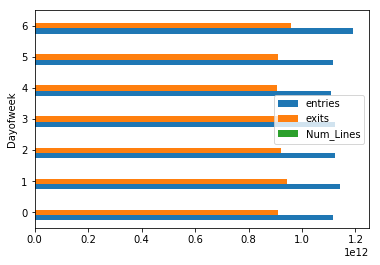

In [10]:
#Your code here
df.date = pd.to_datetime(df.date)
df['Dayofweek'] = df.date.dt.dayofweek
grouped=df.groupby('Dayofweek').sum()
grouped.plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

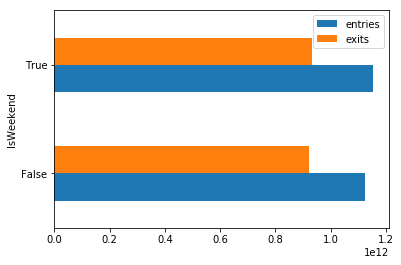

In [11]:
#Your code here
grouped=grouped.reset_index()
grouped['IsWeekend'] = grouped.Dayofweek.map(lambda x: x==5 or x==6)
#grouped['IsWeekend'] = grouped.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
weekend = grouped.groupby('IsWeekend').mean()
weekend[['entries','exits']].plot(kind='barh')

# Drop a couple of columns

In [110]:
df.head(1)

,linename,scp,station,division,date,time,desc,entries,exits,num_lines,dayofweek,Num_Lines,Dayofweek
0,NQR456W,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5,7,5


In [12]:
df=df.drop(['c/a','unit'], axis =1)
df.head(1)

,linename,scp,station,division,date,time,desc,entries,exits,Num_Lines,Dayofweek
0,NQR456W,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
